# Other Clustering Methods
In this assignment, we'll explore clustering algorithms beyond k -means: __mean-shift__, __spectral clustering__, and __affinity propagation__. We'll introduce and explain each one in turn and follow it up with an example.

Each example will use the same simulated dataset containing 3 blobs of points.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline

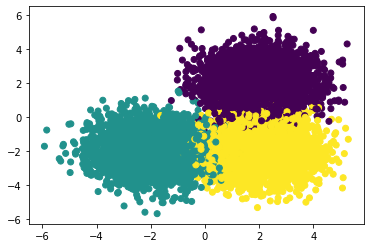

In [5]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Mean-shift
The mean-shift algorithm first calculates a probability density surface (technically, a kernel density surface) across the entire population space. Then, the algorithm iteratively moves each point in the uphill direction. If the point is at the top of a probability hill already, it stays put. Once the shifts are smaller than a predetermined threshold, the algorithm terminates and the points are assigned to a cluster based on the hill they end on.

Mean shift makes no assumption about the nature of the data nor the number of clusters. In fact, some points may not end up clustered at all. This would happen if the points start out in a very flat portion of the probability surface.

One critical user parameter, bandwidth, defines the smoothness of the starting probability surface. A high bandwith (up to 1) will create a smoother surface and a low bandwith (down to 0).

While mean-shift is a good clustering algorithm if you don't know how many clusters to expect, or if you know your clusters are heterogeneous in size and/or shape, it is a computationally expensive algorithm. Thus, it is best left for small to medium-sized datasets only.

In [6]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Setting the bandwidth using an automatic function which inspects 
# the distances among points in the data
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
y_pred = ms.fit_predict(X_test)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count of clusters
n_clusters_ = len(np.unique(labels))

print(f'Number of estimated clusters: {n_clusters_}')

Number of estimated clusters: 3


ValueError: 'c' argument has 9000 elements, which is not acceptable for use with 'x' with size 1000, 'y' with size 1000.

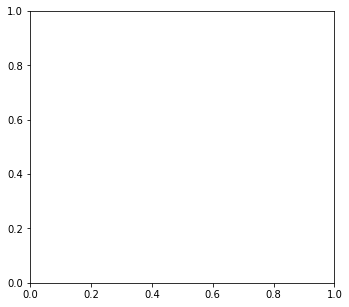

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)

plt.subplot(122)
sns.heatmap(pd.crosstab(y_train, labels), vmin=0, annot=True, fmt='g', cmap='Blues')
plt.show()

ValueError: 'c' argument has 9000 elements, which is not acceptable for use with 'x' with size 1000, 'y' with size 1000.

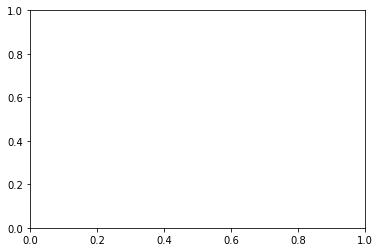

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))